In [210]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
import warnings
from mlxtend.plotting import plot_decision_regions
warnings.simplefilter("ignore", UserWarning)

5. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     #Domain
   -- -----------------------------------------
   1. Sample code number            
   2. Clump Thickness              
   3. Uniformity of Cell Size     
   4. Uniformity of Cell Shape      
   5. Marginal Adhesion             
   6. Single Epithelial Cell Size   
   7. Bare Nuclei                   
   8. Bland Chromatin               
   9. Normal Nucleoli               
  10. Mitoses                       
  11. Class:                        (2 for benign, 4 for malignant)

6. Missing attribute values: 16

## Lendo dados

In [211]:
df = pd.read_csv("data/breast-cancer-wisconsin.csv", delimiter=";")


In [212]:
df.head(5)

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [312]:
y = df.iloc[0:, 10].values
X = df.iloc[0:, 2:4].values

### Construa	um	modelo	de	rede	neural	usando	SGD	e	a	implementação	MLPClassifier	do	sckit-learn.	Você	deve	apresentar	de	forma	gráfica,	os	 erros	 encontrados	 na	 criação	 do	 classificador	 ao	 longo	 de	 cada	época.	Utilize	o	número	de	épocas	igual	a	15	e	taxa	de	aprendizagem	igual	a	0.01

In [280]:
clf_c  =  MLPClassifier(solver = 'sgd' ,  alpha = 1e-5 , 
                   hidden_layer_sizes = ( 5 ,  2 ), 
                      random_state = 1, max_iter=15, learning_rate_init = 0.01  )

In [281]:
clf_c.fit(X,y);

In [282]:
loss_c = clf_c.loss_curve_

In [283]:
loss_c

[0.6670669809359746,
 0.645247236063486,
 0.6204807716901011,
 0.5982160661643848,
 0.5802521560008393,
 0.555429086895727,
 0.5245755282971216,
 0.4954612113134325,
 0.4713904756889047,
 0.4560502856257883,
 0.4431750489659114,
 0.431272485865962,
 0.41519214397368076,
 0.4001545400565912,
 0.385119991636933]

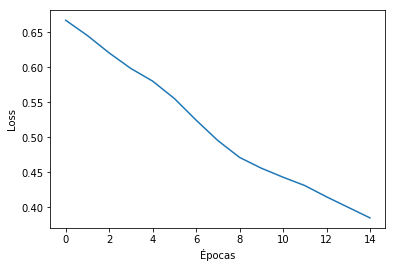

In [284]:
plt.plot(loss_c);
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.show()

In [285]:
scaler = StandardScaler()  
scaler.fit(X)
X = scaler.transform(X)
clf_c.fit(X,y);


In [286]:
loss_std = clf_c.loss_curve_

In [287]:
loss_std

[0.4710869687573191,
 0.45156882359807093,
 0.42623169807277056,
 0.4007602968369357,
 0.3772862834571066,
 0.35577253683902527,
 0.3364244122159052,
 0.31820126139142774,
 0.30161522310187483,
 0.286593838078777,
 0.27282909376673947,
 0.2604311707563442,
 0.2491892407750775,
 0.2388526980302143,
 0.23004256742701312]

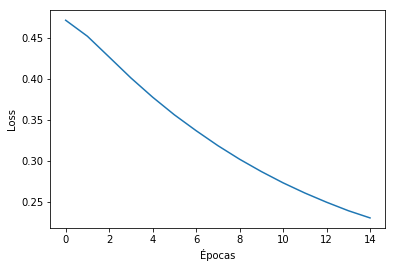

In [288]:
plt.plot(loss_std);
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.show()

### Construa	 um	 outro	 modelo	 de	 rede	 neural	 usando	 SGD	 e	 a	implementação	 MLPRegressor	 do	 sckit-learn.	 Você	 deve	 apresentar	de	forma	gráfica,	os	erros	encontrados	na	criação	do	classificador	ao	longo	de	cada	época.	Utilize	o	número	de	épocas	igual	a	15	e	taxa	de	aprendizagem	igual	a	0.01.	

In [289]:
clf_r  =  MLPRegressor(solver = 'sgd' ,  alpha = 1e-5 , 
                   hidden_layer_sizes = ( 5 ,  2 ), 
                      random_state = 1, max_iter=15, learning_rate_init = 0.01)

In [290]:
clf_r.fit(X,y);

In [291]:
loss_r = clf_r.loss_curve_

In [292]:
loss_r

[4.396022327192577,
 1.3444725111357685,
 0.7185768414472035,
 0.5225020709053688,
 0.45880075201831855,
 0.4560175296484498,
 0.4711087545632202,
 0.47964401607096463,
 0.4784832668645131]

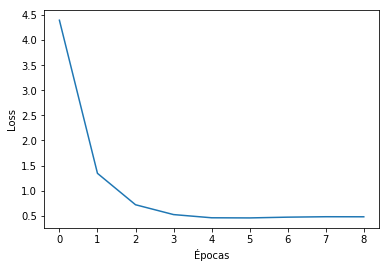

In [293]:
plt.plot(loss_r)
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.show();

In [294]:
clf_r.fit(X,y)
loss_r = clf_r.loss_curve_

In [295]:
clf_r.loss_curve_

[4.396022327192577,
 1.3444725111357685,
 0.7185768414472035,
 0.5225020709053688,
 0.45880075201831855,
 0.4560175296484498,
 0.4711087545632202,
 0.47964401607096463,
 0.4784832668645131]

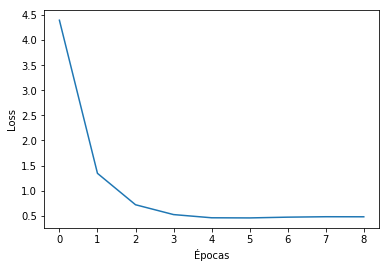

In [296]:
plt.plot(loss_r)
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.show();

### Compare	 os	 resultados	 obtidos	 em	 3	 e	 4,	 e	 explique	 as	 diferenças	 entre	os	dois	classificadores.	Para	mais	detalhes	sobre	as	diferenças,	 consulte	a	documentação.

A classe MLPRegressorimplementa um perceptron multicamadas (MLP) que treina usando backpropagation sem nenhuma função de ativação na camada de saída, esse modelo usa o erro quadrado como a função de perda e a saída é um conjunto de valores contínuos.

## Compare	 os	 erros	 graficamente	 ao	 longo	 das	 iterações	 para	 ambos	 classificadores,	no	entanto,	considere	a	variação	dos	parâmetros	para	cada	método.	Varie	(a)	o	número	de	épocas:	15,	20,	30;	(b)	a	taxa	de	aprendizagem:	0.001,	0.01	e	0.1;	(c)	momentum:	0,	0.5,	0.9	que	é	um	fator	que	ajuda	a	acelerar	a	convergência	do	gradiente	descendente.	

In [297]:
lr = [0.001, 0.01, 0.1]
momentum = [0, 0.5, 0.9]
iteracoes = [15, 20, 30]


In [298]:
def create_models(lr, momentum, iteracoes):
    
    for lr in lr:
        for moment in momentum:
            for ite in iteracoes:
                clf_c  =  MLPClassifier(solver = 'sgd' ,  alpha = 1e-5 , 
                               hidden_layer_sizes = ( 5 ,  2 ), 
                                  random_state = 1, max_iter=ite, learning_rate_init = lr, momentum=moment)
                print("MLPClassifier, ","Taxa de aprendizagem: ",str(lr),"momentum: ", str(moment),  ": Número de épocas", str(ite), )
                clf_c.fit(X,y)
                loss_c = clf_c.loss_curve_
                plt.plot(loss_c)
                plt.xlabel("Épocas")
                plt.ylabel("Loss")
                plt.show();
                loss_c.clear

                clf_r  =  MLPRegressor(solver = 'sgd' ,  alpha = 1e-5 , 
                               hidden_layer_sizes = ( 5 ,  2 ), 
                                  random_state = 1, max_iter=ite, learning_rate_init =ite, momentum=moment)
                
                print("MLPRegressor, ","Taxa de aprendizagem: ",str(lr),"momentum: ", str(moment),  " Número de épocas", str(ite), )
                clf_r.fit(X,y)
                loss_r = clf_r.loss_curve_
                clf_r.fit(X,y)
                loss_e = clf_r.loss_curve_
                plt.plot(loss_r)
                plt.xlabel("Épocas")
                plt.ylabel("Loss regressor")
                plt.show();
                loss_r.clear

    
    
    

MLPClassifier,  Taxa de aprendizagem:  0.001 momentum:  0 : Número de épocas 15


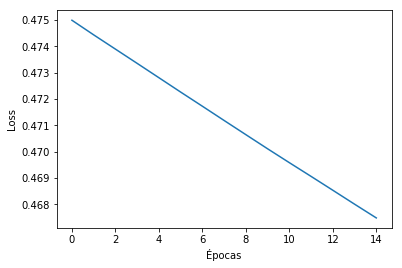

MLPRegressor,  Taxa de aprendizagem:  0.001 momentum:  0  Número de épocas 15


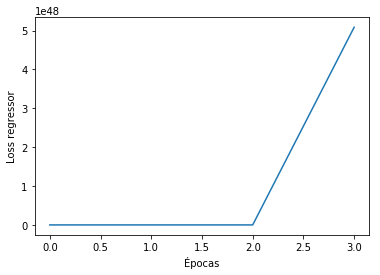

MLPClassifier,  Taxa de aprendizagem:  0.001 momentum:  0 : Número de épocas 20


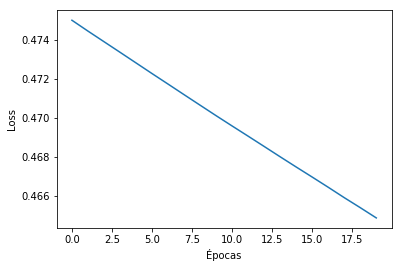

MLPRegressor,  Taxa de aprendizagem:  0.001 momentum:  0  Número de épocas 20


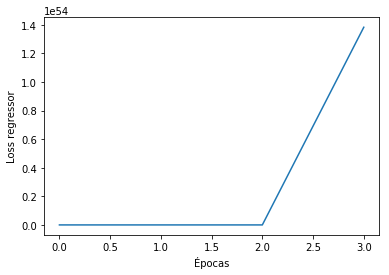

MLPClassifier,  Taxa de aprendizagem:  0.001 momentum:  0 : Número de épocas 30


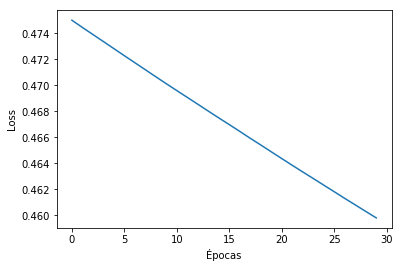

MLPRegressor,  Taxa de aprendizagem:  0.001 momentum:  0  Número de épocas 30


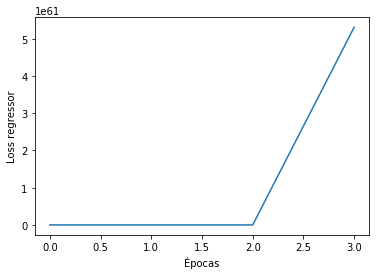

MLPClassifier,  Taxa de aprendizagem:  0.001 momentum:  0.5 : Número de épocas 15


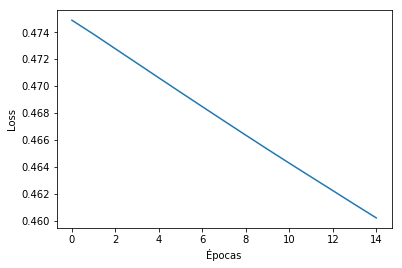

MLPRegressor,  Taxa de aprendizagem:  0.001 momentum:  0.5  Número de épocas 15


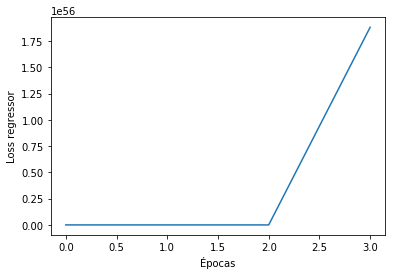

MLPClassifier,  Taxa de aprendizagem:  0.001 momentum:  0.5 : Número de épocas 20


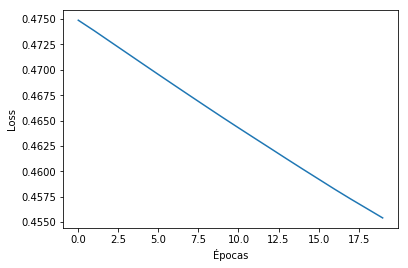

MLPRegressor,  Taxa de aprendizagem:  0.001 momentum:  0.5  Número de épocas 20


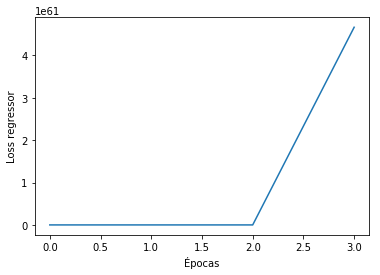

MLPClassifier,  Taxa de aprendizagem:  0.001 momentum:  0.5 : Número de épocas 30


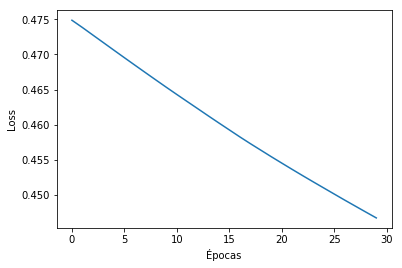

MLPRegressor,  Taxa de aprendizagem:  0.001 momentum:  0.5  Número de épocas 30


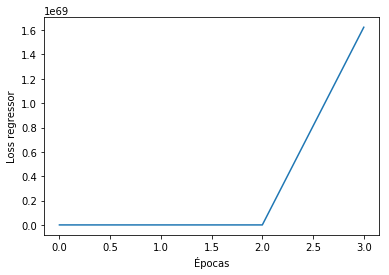

MLPClassifier,  Taxa de aprendizagem:  0.001 momentum:  0.9 : Número de épocas 15


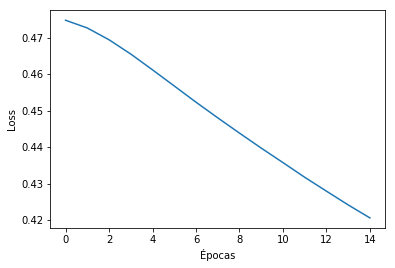

MLPRegressor,  Taxa de aprendizagem:  0.001 momentum:  0.9  Número de épocas 15


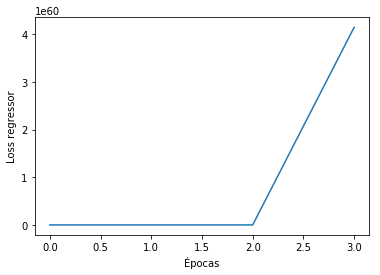

MLPClassifier,  Taxa de aprendizagem:  0.001 momentum:  0.9 : Número de épocas 20


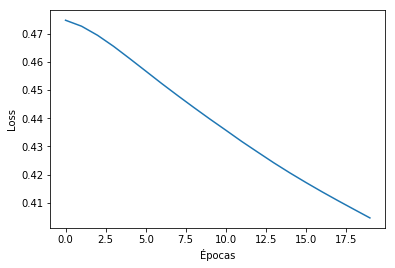

MLPRegressor,  Taxa de aprendizagem:  0.001 momentum:  0.9  Número de épocas 20


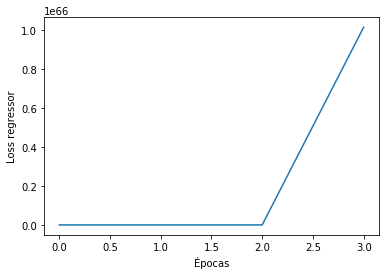

MLPClassifier,  Taxa de aprendizagem:  0.001 momentum:  0.9 : Número de épocas 30


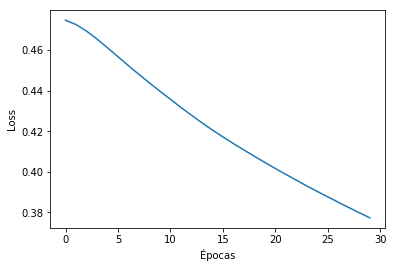

MLPRegressor,  Taxa de aprendizagem:  0.001 momentum:  0.9  Número de épocas 30


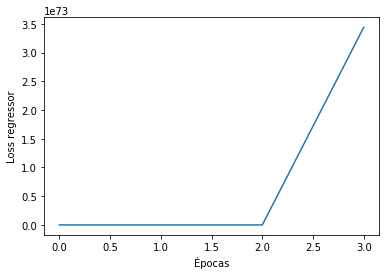

MLPClassifier,  Taxa de aprendizagem:  0.01 momentum:  0 : Número de épocas 15


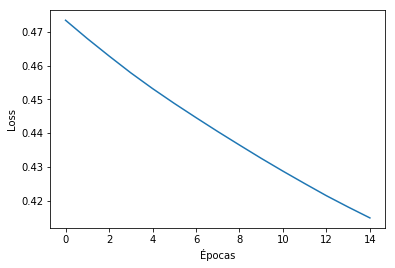

MLPRegressor,  Taxa de aprendizagem:  0.01 momentum:  0  Número de épocas 15


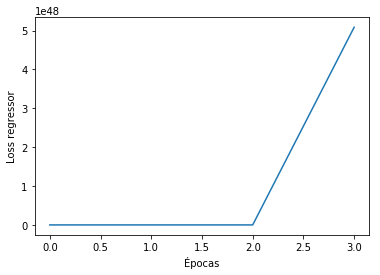

MLPClassifier,  Taxa de aprendizagem:  0.01 momentum:  0 : Número de épocas 20


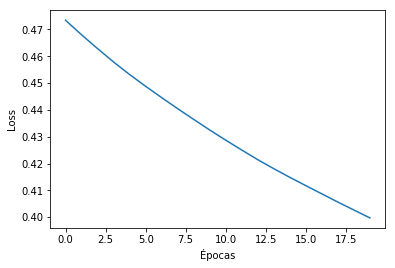

MLPRegressor,  Taxa de aprendizagem:  0.01 momentum:  0  Número de épocas 20


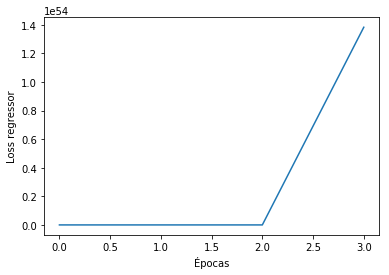

MLPClassifier,  Taxa de aprendizagem:  0.01 momentum:  0 : Número de épocas 30


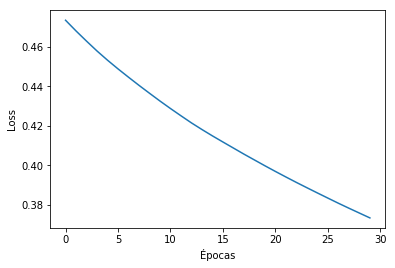

MLPRegressor,  Taxa de aprendizagem:  0.01 momentum:  0  Número de épocas 30


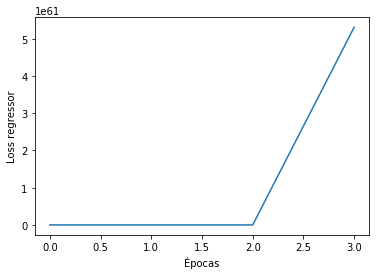

MLPClassifier,  Taxa de aprendizagem:  0.01 momentum:  0.5 : Número de épocas 15


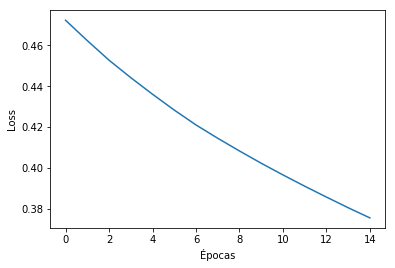

MLPRegressor,  Taxa de aprendizagem:  0.01 momentum:  0.5  Número de épocas 15


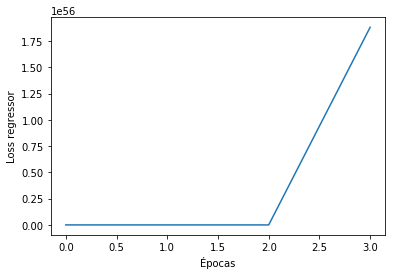

MLPClassifier,  Taxa de aprendizagem:  0.01 momentum:  0.5 : Número de épocas 20


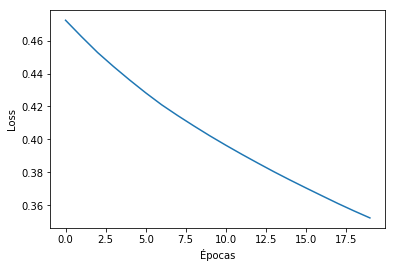

MLPRegressor,  Taxa de aprendizagem:  0.01 momentum:  0.5  Número de épocas 20


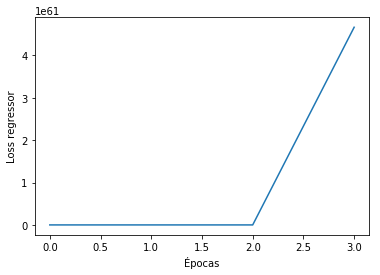

MLPClassifier,  Taxa de aprendizagem:  0.01 momentum:  0.5 : Número de épocas 30


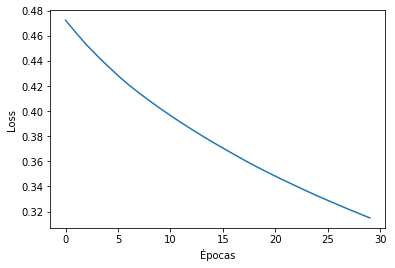

MLPRegressor,  Taxa de aprendizagem:  0.01 momentum:  0.5  Número de épocas 30


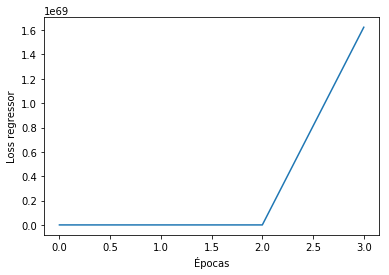

MLPClassifier,  Taxa de aprendizagem:  0.01 momentum:  0.9 : Número de épocas 15


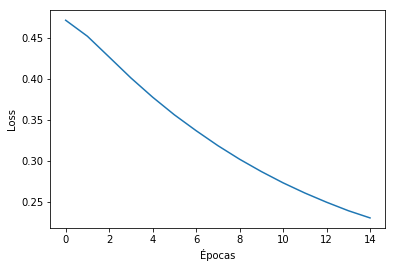

MLPRegressor,  Taxa de aprendizagem:  0.01 momentum:  0.9  Número de épocas 15


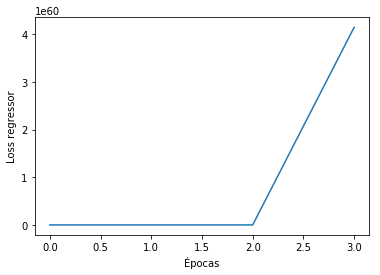

MLPClassifier,  Taxa de aprendizagem:  0.01 momentum:  0.9 : Número de épocas 20


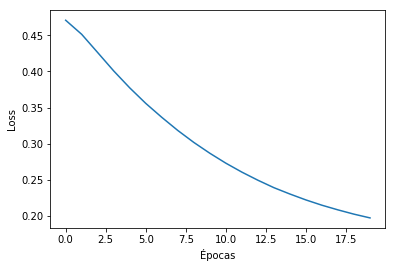

MLPRegressor,  Taxa de aprendizagem:  0.01 momentum:  0.9  Número de épocas 20


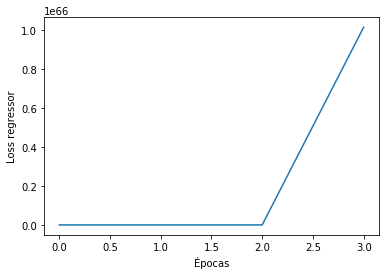

MLPClassifier,  Taxa de aprendizagem:  0.01 momentum:  0.9 : Número de épocas 30


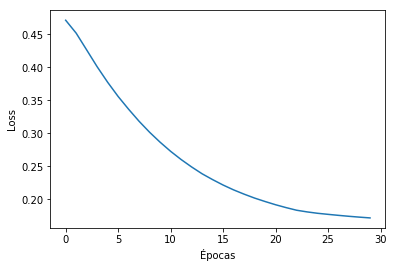

MLPRegressor,  Taxa de aprendizagem:  0.01 momentum:  0.9  Número de épocas 30


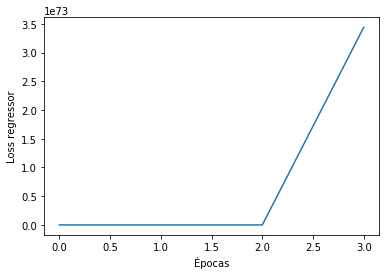

MLPClassifier,  Taxa de aprendizagem:  0.1 momentum:  0 : Número de épocas 15


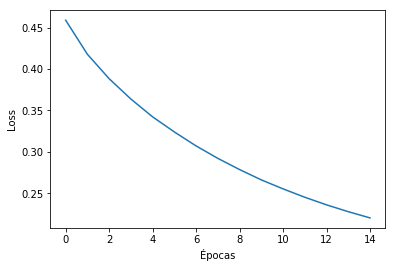

MLPRegressor,  Taxa de aprendizagem:  0.1 momentum:  0  Número de épocas 15


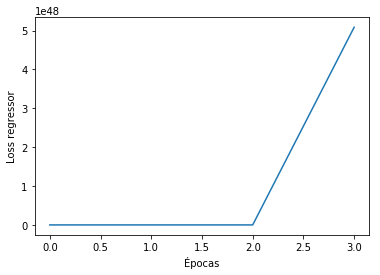

MLPClassifier,  Taxa de aprendizagem:  0.1 momentum:  0 : Número de épocas 20


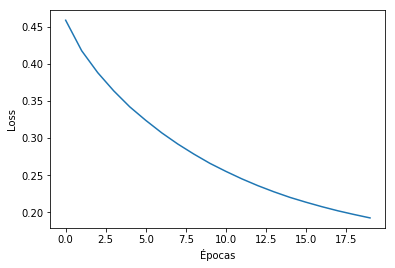

MLPRegressor,  Taxa de aprendizagem:  0.1 momentum:  0  Número de épocas 20


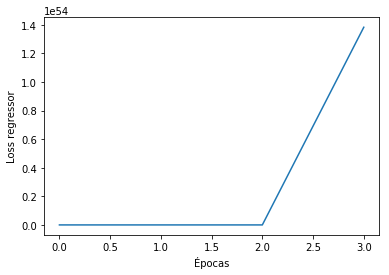

MLPClassifier,  Taxa de aprendizagem:  0.1 momentum:  0 : Número de épocas 30


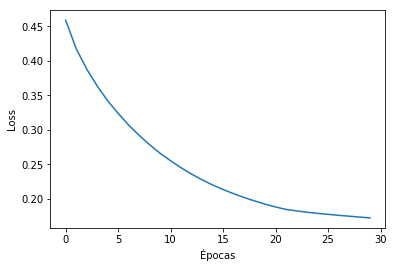

MLPRegressor,  Taxa de aprendizagem:  0.1 momentum:  0  Número de épocas 30


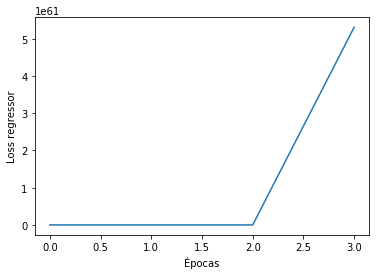

MLPClassifier,  Taxa de aprendizagem:  0.1 momentum:  0.5 : Número de épocas 15


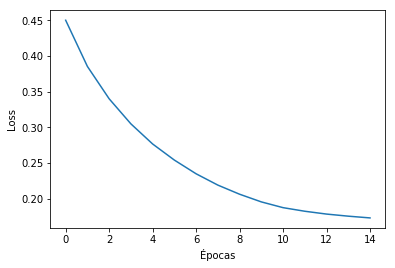

MLPRegressor,  Taxa de aprendizagem:  0.1 momentum:  0.5  Número de épocas 15


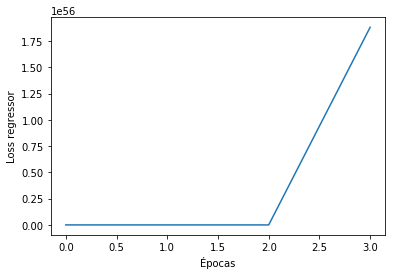

MLPClassifier,  Taxa de aprendizagem:  0.1 momentum:  0.5 : Número de épocas 20


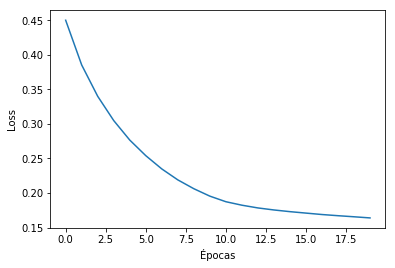

MLPRegressor,  Taxa de aprendizagem:  0.1 momentum:  0.5  Número de épocas 20


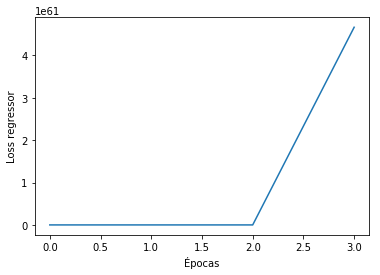

MLPClassifier,  Taxa de aprendizagem:  0.1 momentum:  0.5 : Número de épocas 30


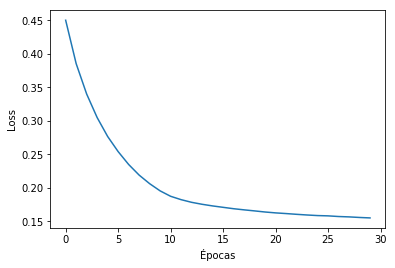

MLPRegressor,  Taxa de aprendizagem:  0.1 momentum:  0.5  Número de épocas 30


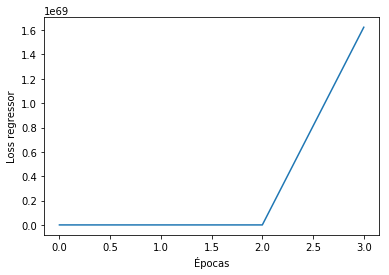

MLPClassifier,  Taxa de aprendizagem:  0.1 momentum:  0.9 : Número de épocas 15


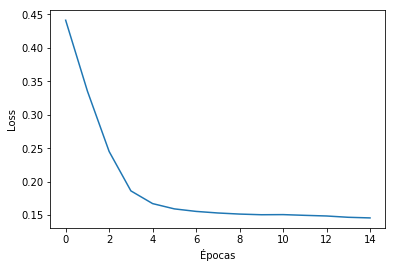

MLPRegressor,  Taxa de aprendizagem:  0.1 momentum:  0.9  Número de épocas 15


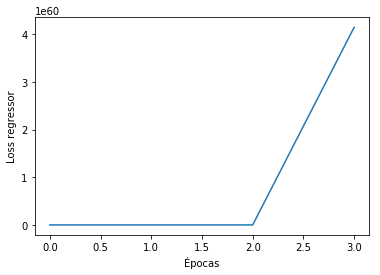

MLPClassifier,  Taxa de aprendizagem:  0.1 momentum:  0.9 : Número de épocas 20


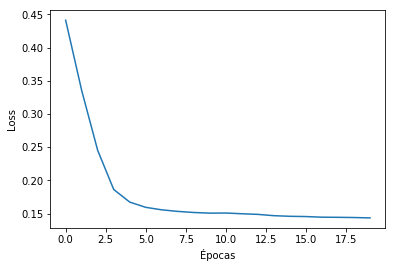

MLPRegressor,  Taxa de aprendizagem:  0.1 momentum:  0.9  Número de épocas 20


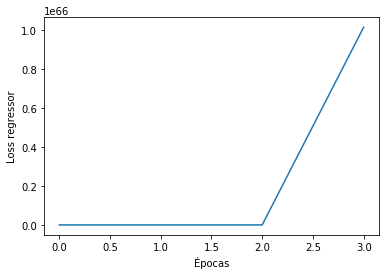

MLPClassifier,  Taxa de aprendizagem:  0.1 momentum:  0.9 : Número de épocas 30


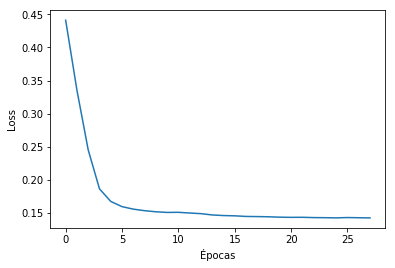

MLPRegressor,  Taxa de aprendizagem:  0.1 momentum:  0.9  Número de épocas 30


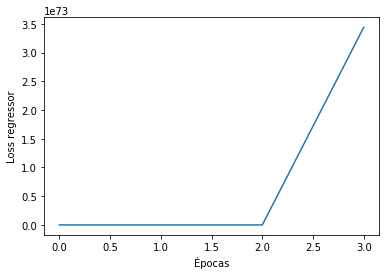

In [299]:
create_models(lr,momentum, iteracoes)

## Perceptron

In [334]:
class Perceptron(object):

    def __init__(self, lr = 0.01, epochs = 50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [335]:
y = df.iloc[0:, 10].values
X = df.iloc[0:, 2:4].values

In [336]:
# Criando o modelo
clf_perceptron = Perceptron(epochs = 10, lr = 0.1)

In [337]:
# Treinamento
y = np.where(y == 2, -1, 1)
clf_perceptron.fit(X, y);

In [338]:
# Pesos aprendidos pelo modelo
clf_perceptron.w_

array([-8.8,  1. ,  1.6])

Pesos (Weights): [-8.8  1.   1.6]


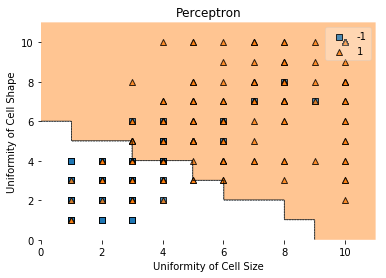

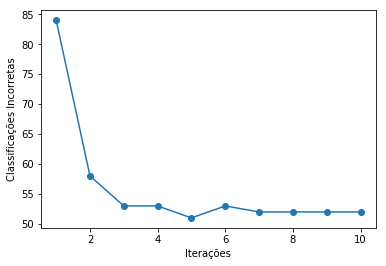

In [357]:
# Plot
print('Pesos (Weights): %s' % clf_perceptron.w_)
plot_decision_regions(X, y, clf = clf_perceptron)
plt.title('Perceptron')
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Uniformity of Cell Shape')
plt.show()

plt.plot(range(1, len(clf_perceptron.errors_)+1), clf_perceptron.errors_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Classificações Incorretas')
plt.show()

In [340]:
print('Número Total de Classificações Incorretas: %d of 100' % (y != clf_perceptron.predict(X)).sum())

Número Total de Classificações Incorretas: 42 of 100


# Adaline

In [380]:
# Adaline com Gradiebte Descendente
class AdalineGD(object):

    def __init__(self, lr = 0.01, epochs = 50):
        self.lr = lr
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            #Gradiebte Descendente
            self.w_[1:] += self.lr * X.T.dot(errors)
            self.w_[0] += self.lr * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

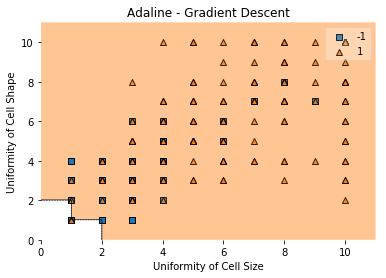

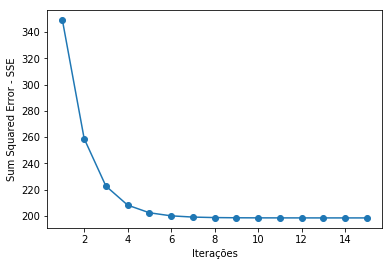

In [382]:
ada = AdalineGD(epochs = 15, lr = 0.001)

ada.train(X_std, y)
plot_decision_regions(X, y, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Uniformity of Cell Shape')
plt.show()

plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Sum Squared Error - SSE')
plt.show()

# Adaline	com	gradiente	descendente	estocástico

In [395]:
# Algoritmo Adaline com Gradient Descent
class AdalineSGD(object):

    def __init__(self, lr = 0.01, epochs = 50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            for xi, target in zip(X, y):
                output = self.net_input(xi)
                error = (target - output)
                self.w_[1:] += self.lr * xi.dot(error)
                self.w_[0] += self.lr * error

            cost = ((y - self.activation(X))**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

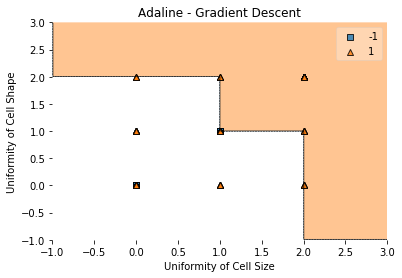

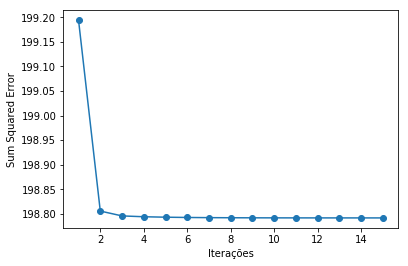

In [397]:
# Modelo
adas = AdalineSGD(epochs = 15, lr = 0.01)

# Dados randômicos
np.random.seed(123)
idx = np.random.permutation(len(y))
X_shuffled, y_shuffled =  X_std[idx], y[idx]

# Treinamento e Plot
adas.fit(X_shuffled, y_shuffled)
plot_decision_regions(X_shuffled, y_shuffled, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Uniformity of Cell Size')
plt.ylabel('Uniformity of Cell Shape')
plt.show()

plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Sum Squared Error')
plt.show()

In [391]:
print('Número Total de Classificações Incorretas: %d of 100' % (y != adas.predict(X)).sum())

Número Total de Classificações Incorretas: 457 of 100
